<a href="https://colab.research.google.com/github/Gustavo-Bruges/ciencia-de-datos-unab/blob/notebooks/Datos_externos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook proporciona recetas para cargar y guardar datos de fuentes externas.

# Sistema de archivos local

## Subir archivos desde el sistema de archivos local

<code>files.upload</code> muestra un diccionario de los archivos que se cargaron.
El diccionario está codificado según el nombre de archivo y los valores son los datos que se subieron.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving clean_books.csv to clean_books.csv
User uploaded file "clean_books.csv" with length 30047 bytes


In [3]:
import pandas as pd


In [4]:
books = pd.read_csv('clean_books.csv')

In [6]:
books.head(2)

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [8]:
books.value_counts('genre')

,count
genre,
Non Fiction,179
Fiction,131
Childrens,40


In [9]:
round(books.describe())

,rating,year
count,350.0,350.0
mean,5.0,2014.0
std,0.0,3.0
min,3.0,2009.0
25%,4.0,2010.0
50%,5.0,2013.0
75%,5.0,2016.0
max,5.0,2019.0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


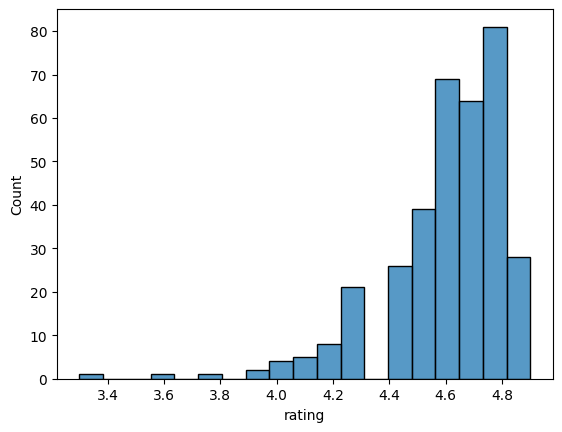

In [9]:
sns.histplot(data = books, x = 'rating')
plt.show()

In [11]:
unemployment = pd.read_csv('clean_unemployment.csv')

In [12]:
print(unemployment.head(5))

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [13]:
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [14]:
print(round(unemployment.describe()))

        2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  \
count  182.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0  182.0   
mean     8.0    8.0    8.0    8.0    8.0    8.0    8.0    8.0    7.0    7.0   
std      6.0    6.0    6.0    6.0    6.0    6.0    6.0    6.0    6.0    6.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      4.0    4.0    4.0    4.0    4.0    4.0    4.0    4.0    4.0    3.0   
50%      7.0    7.0    7.0    6.0    6.0    6.0    6.0    6.0    5.0    5.0   
75%     11.0   11.0   11.0   11.0   11.0   10.0   10.0   10.0    9.0    9.0   
max     32.0   31.0   31.0   29.0   28.0   28.0   27.0   27.0   27.0   28.0   

        2020   2021  
count  182.0  182.0  
mean     8.0    8.0  
std      6.0    6.0  
min      0.0    0.0  
25%      4.0    4.0  
50%      7.0    6.0  
75%     11.0   11.0  
max     29.0   34.0  


In [17]:
# Count the values associated with each continent in unemployment
print(unemployment['continent'].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


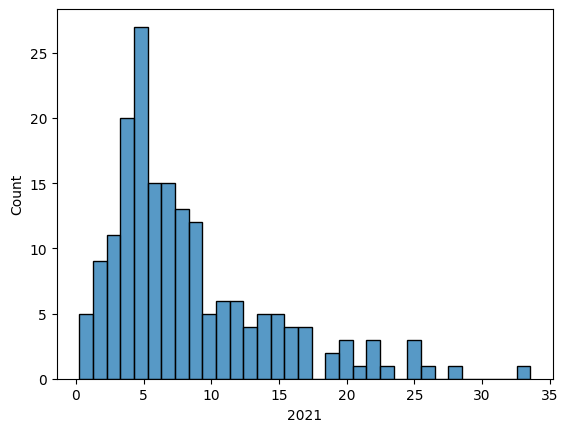

In [15]:
# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x="2021", binwidth=1)
plt.show()

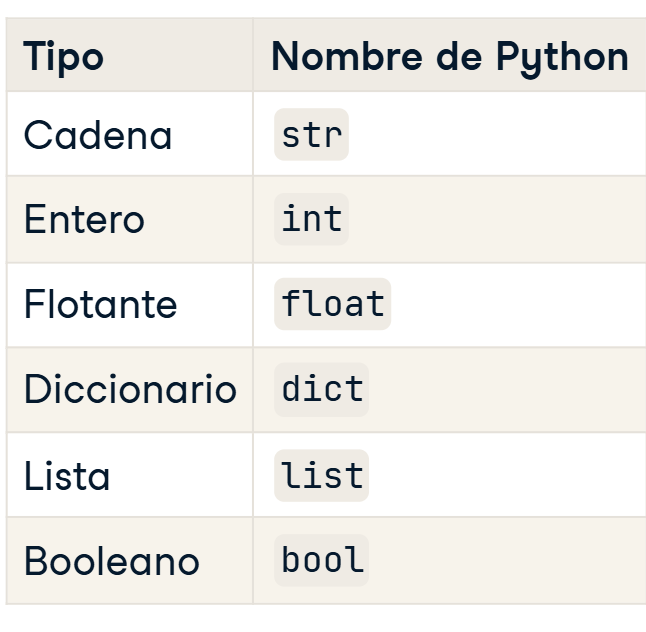

In [16]:
books.dtypes

,0
name,object
author,object
rating,float64
year,int64
genre,object


In [17]:
books.year = books.year.astype(int)

In [18]:
filtro = books.genre.isin(['Fiction', 'Non Fiction'])

In [19]:
books[filtro].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [20]:
books.select_dtypes('number').head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [ ]:
iqr

In [22]:
print(books['year'].min())
print(books['year'].max())


2009
2019


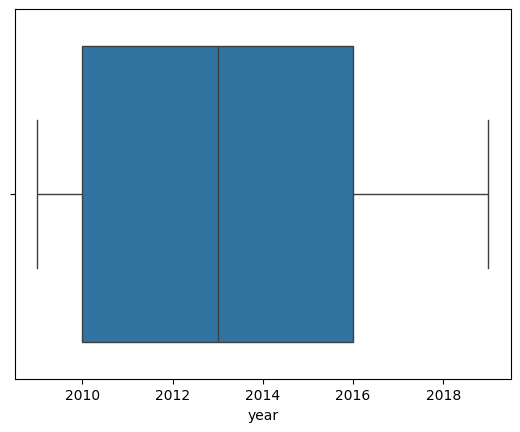

In [23]:
sns.boxplot(data = books, x = 'year')
plt.show()

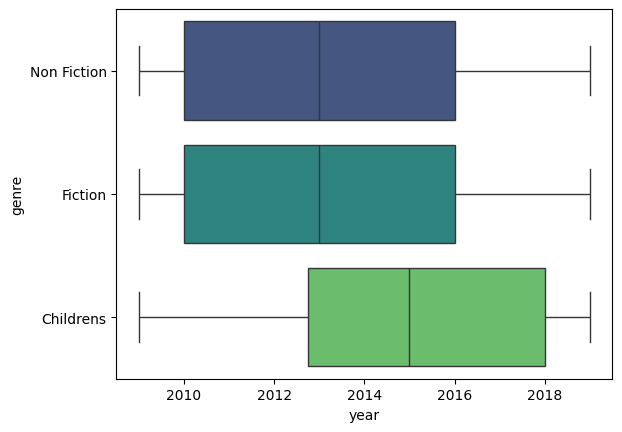

In [31]:
sns.boxplot(
    data=books,
    x='year',
    y='genre',
    hue='genre',
    palette='viridis',
    legend=False
)

plt.show()

In [32]:
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


In [34]:
not_oceania = ~unemployment.continent.isin(['Oceania'])
not_oceania

,continent
0,True
1,True
2,True
3,True
4,True
...,...
177,False
178,True
179,True
180,True


In [35]:
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

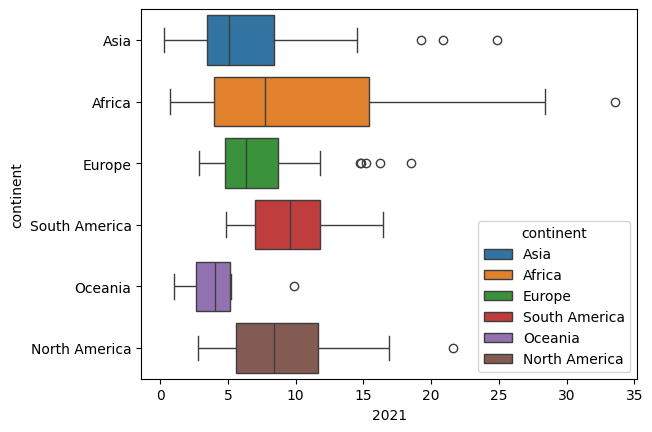

In [38]:
sns.boxplot(data = unemployment, x = '2021', y = 'continent', hue ='continent')
plt.show()

In [40]:
books[['genre','rating','year']].groupby('genre').mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


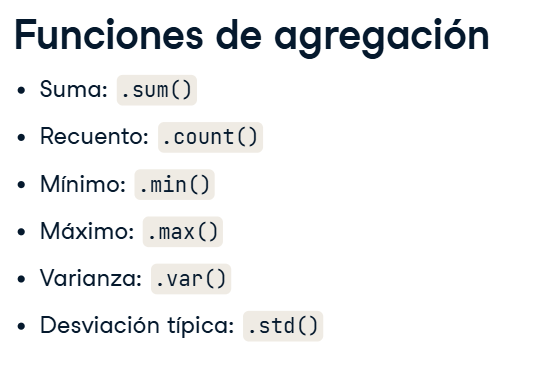

In [45]:
books[['genre','rating']].groupby('genre').agg(['mean','std'])

rating          
                 mean       std
genre                          
Childrens    4.780000  0.122370
Fiction      4.570229  0.281123
Non Fiction  4.598324  0.179411

In [46]:
books.agg({'rating':['mean','std'], 'year':['median']})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [47]:
books.groupby('genre').agg(
    mean_rating =('rating', 'mean'),
    std_rating = ('rating','std'),
    median_year = ('year','median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


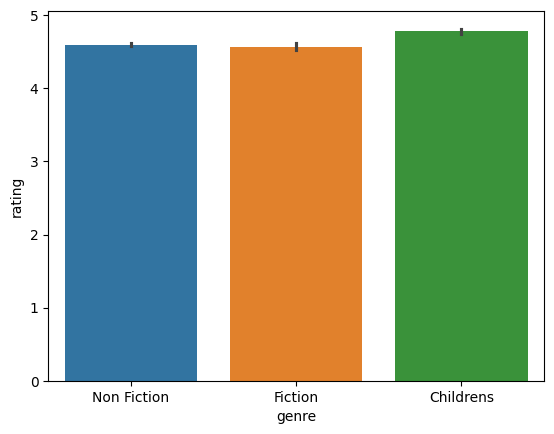

In [50]:
sns.barplot(data = books, x = 'genre', y = 'rating', hue='genre')
plt.show()

In [53]:
# Print the mean and standard deviation of rates for 2019 and 2020
print(unemployment[["2019", "2020"]].agg(['mean', 'std']))

          2019      2020
mean  7.243736  8.420934
std   5.696573  6.040915


In [54]:
# Print mean and standard deviation grouped by continent
print(unemployment[["continent", "2019", "2020"]].groupby('continent').agg(['mean','std']))

                   2019                 2020          
                   mean       std       mean       std
continent                                             
Africa         9.264340  7.455293  10.307736  7.928166
Asia           5.949149  5.254008   7.012340  5.699609
Europe         6.764359  4.124734   7.470513  4.071218
North America  7.095000  4.770490   9.297778  4.963045
Oceania        3.773750  2.369068   4.273750  2.617490
South America  7.719167  3.379845  10.275000  3.411263


In [55]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021=('2021','std')
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


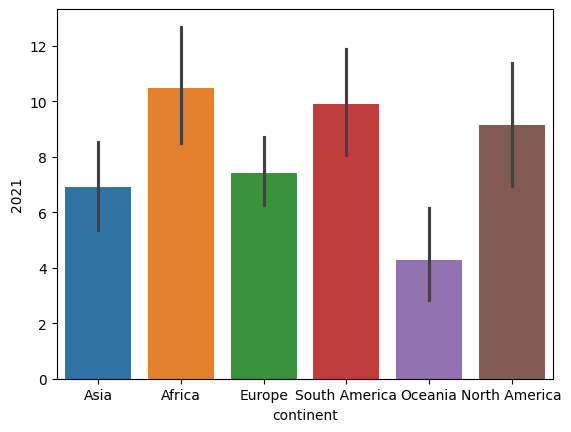

In [57]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data = unemployment, x = 'continent', y = '2021', hue = 'continent', legend= False)
plt.show()

## Descargar archivos en el sistema de archivos local

<code>files.download</code> invocará una descarga del archivo desde el navegador a tu computadora local.


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Google Drive

Puedes acceder a archivos en Drive de varias maneras, incluidas las siguientes:
- Activación de Google Drive en la máquina virtual del entorno de ejecución
- Usar un wrapper alrededor de la API, como <a href="https://docs.iterative.ai/PyDrive2/">PyDrive2</a>
- Usar la <a href="https://developers.google.com/drive/v3/web/about-sdk">API nativa de REST</a>



Puedes ver ejemplos de cada caso más abajo.

## Activar Google Drive de forma local

El ejemplo siguiente muestra cómo activar Google Drive en el entorno de ejecución mediante un código de autorización y cómo escribir y leer archivos allí. Una vez ejecutado, podrás ver el archivo nuevo &#40;<code>foo.txt</code>&#41; en <a href="https://drive.google.com/">https://drive.google.com/</a>.

Esta configuración solo permite leer, escribir y mover archivos. Para modificar de forma programática la configuración de uso compartido o algún otro metadato, prueba con las opciones de más abajo.

<strong>Nota:</strong> Si utilizas el botón "Activar unidad de Drive" en el navegador de archivos, no necesitas ningún código de autenticación para los notebooks que solo modificó el usuario actual.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


## PyDrive2

En los ejemplos que aparecen a continuación, se muestran la autenticación y la carga y descarga de archivos con PyDrive2. Puedes encontrar más ejemplos en la <a href="https://docs.iterative.ai/PyDrive2/">documentación de PyDrive2</a>.

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Autentica y crea el cliente de PyDrive2.


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Crea y sube un archivo de texto.


In [ ]:
uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 14vDAdqp7BSCQnoougmgylBexIr2AQx2T


Carga un archivo por su ID y luego imprime su contenido.


In [ ]:
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Sample upload file content"


## API de REST de Drive

Para usar la API de Drive, primero debemos autenticar y construir un cliente de API.


In [ ]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

Con este cliente, podemos usar cualquiera de las funciones de la <a href="https://developers.google.com/drive/v3/reference/">referencia de la API de Google Drive</a>. Puedes ver algunos ejemplos debajo.


### Crear un archivo de Drive nuevo con datos de Python

Primero, crea un archivo local para poder subirlo después.

In [ ]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Sube el archivo utilizando el método <a href="https://developers.google.com/drive/v3/reference/files/create"><code>files.create</code></a>. Puedes encontrar más detalles sobre cómo subir archivos en la <a href="https://developers.google.com/drive/v3/web/manage-uploads">documentación para desarrolladores</a>.

In [ ]:
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'Sample file',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/tmp/to_upload.txt',
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1Cw9CqiyU6zbXFD9ViPZu_3yX-sYF4W17


Después de ejecutar la celda anterior, se mostrará un archivo nuevo con el nombre "Sample file" en <a href="https://drive.google.com/">https://drive.google.com/</a>.

### Descargar datos de un archivo de Drive a Python

Descarga el archivo que subimos anteriormente.

In [ ]:
file_id = created.get('id')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))

Downloaded file contents are: b'my sample file'


Para descargar un archivo diferente, establece el <code>file&#95;id</code> anterior con el ID de ese archivo, que se verá así: "1uBtlaggVyWshwcyP6kEI-y&#95;W3P8D26sz".

# Hojas de cálculo de Google


## Extensión de Google Workspace de Hojas de cálculo

Tenemos una extensión de Workspace, <a href="https://workspace.google.com/u/0/marketplace/app/sheets_to_colab/945625412720">Hojas de cálculo a Colab</a>, que te permite importar datos directamente de Hojas de cálculo de Google a Colab desde la IU de Hojas de cálculo. Para obtener más información, sigue el vínculo a la Extensión de Workspace de Hojas de cálculo a Colab.

## Interactúa con Hojas de cálculo de Google mediante gspread

También puedes usar la biblioteca de código abierto <a href="https://github.com/burnash/gspread"><code>gspread</code></a> para interactuar con Hojas de cálculo de Google. En el siguiente código, se muestra cómo configurar y autenticar <code>gspread</code>.

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

A continuación, verás un pequeño conjunto de ejemplos de <code>gspread</code>. Puedes encontrar más ejemplos en la <a href="https://github.com/burnash/gspread#more-examples">página de GitHub de <code>gspread</code></a>.

### Crear una hoja nueva con datos de Python

In [ ]:
sh = gc.create('My cool spreadsheet')

Después de ejecutar la celda anterior, se mostrará una nueva hoja de cálculo con el nombre "My cool spreadsheet" en <a href="https://sheets.google.com/">https://sheets.google.com</a>.

Abre la hoja nueva y agrega datos aleatorios.

In [ ]:
worksheet = gc.open('My cool spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)

{'spreadsheetId': '1dsQeN0YzXuM387l_CuyEbsYzL2ew9TJFzR-E-RQnwxs',
 'updatedCells': 6,
 'updatedColumns': 3,
 'updatedRange': 'Sheet1!A1:C2',
 'updatedRows': 2}

### Descargar datos de una hoja de cálculo en Python como un DataFrame de Pandas

Vuelve a leer los datos aleatorios que insertamos anteriormente y convierte el resultado en un <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">DataFrame de Pandas</a>.

In [ ]:
worksheet = gc.open('My cool spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

import pandas as pd
pd.DataFrame.from_records(rows)

[['6', '3', '4'], ['7', '2', '1']]


,0,1,2
0,6,3,4
1,7,2,1


# InteractiveSheet

Ahora puedes incorporar Hojas de cálculo de Google en Colab en tiempo real con la biblioteca <code>InteractiveSheet</code>. Esto significa que puedes crear y editar datos en Hojas de cálculo de Google y, luego, incorporarlos sin problemas en tu notebook con DataFrames de Pandas desde Colab.

In [ ]:
from google.colab import sheets

# Create a new interactive sheet and add data to it.
sheet = sheets.InteractiveSheet()

In [ ]:
# Get a Pandas DataFrame from the selected worksheet
df = sheet.as_df()

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

# Create a new sheet and include the column names as the first row.
sheet = sheets.InteractiveSheet(df=df, title='foo', include_column_headers=True)

In [ ]:
# Push data from Colab to the selected worksheet
df2 = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
sheet.update(df=df)

In [ ]:
# Display the sheet in the output of the current cell
sheet.display()

# Google Cloud Storage &#40;GCS&#41;

Para usar Colaboratory con GCS, deberás crear un <a href="https://cloud.google.com/storage/docs/projects">proyecto de Google Cloud</a> o utilizar uno existente.

A continuación, especifica el ID del proyecto:

In [ ]:
project_id = 'Your_project_ID_here'

Los archivos en GCS están contenidos en <a href="https://cloud.google.com/storage/docs/buckets">depósitos</a>.

Los depósitos deben tener un nombre global único, así que generamos uno aquí.

In [ ]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

Para acceder a GCS, debemos realizar la autenticación.

In [ ]:
from google.colab import auth
auth.authenticate_user()

Se puede acceder a GCS a través de la línea de comandos <code>gsutil</code> o a través de la API nativa de Python.

## `gsutil`

Primero, configuramos <code>gsutil</code> para usar el proyecto que ya especificamos anteriormente mediante <code>gcloud</code>.

In [ ]:
!gcloud config set project {project_id}

Updated property [core/project].


Crea un archivo local para poder subirlo después.

In [ ]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Crea un bucket donde subir el archivo &#40;<a href="https://cloud.google.com/storage/docs/gsutil/commands/mb">documentación</a>&#41;.

In [ ]:
!gsutil mb gs://{bucket_name}

Creating gs://colab-sample-bucket-44971372-baaf-11e7-ae30-0242ac110002/...


Copiar el archivo en nuestro nuevo bucket &#40;<a href="https://cloud.google.com/storage/docs/gsutil/commands/cp">documentación</a>&#41;.

In [ ]:
!gsutil cp /tmp/to_upload.txt gs://{bucket_name}/

Copying file:///tmp/to_upload.txt [Content-Type=text/plain]...
/ [1 files][   14.0 B/   14.0 B]                                                
Operation completed over 1 objects/14.0 B.                                       


Vuelca el contenido de nuestro archivo recién copiado para asegurarte de que todo funcionó &#40;<a href="https://cloud.google.com/storage/docs/gsutil/commands/cat">documentación</a>&#41;.


In [ ]:
!gsutil cat gs://{bucket_name}/to_upload.txt

my sample file

In [ ]:
# @markdown Una vez que se suba el archivo, aparecerán los datos en el navegador de almacenamiento de Cloud Console para el proyecto:
print('https://console.cloud.google.com/storage/browser?project=' + project_id)

https://console.cloud.google.com/storage/browser?project=Your_project_ID_here


Finalmente, descargaremos el archivo que acabamos de subir en el ejemplo anterior. Solo tienes que invertir el orden en el comando <code>gsutil cp</code>.

In [ ]:
!gsutil cp gs://{bucket_name}/to_upload.txt /tmp/gsutil_download.txt

# Imprime el resultado para asegurarte de que la transferencia funcionó.
!cat /tmp/gsutil_download.txt

Copying gs://colab-sample-bucket483f20dc-baaf-11e7-ae30-0242ac110002/to_upload.txt...
/ [1 files][   14.0 B/   14.0 B]                                                
Operation completed over 1 objects/14.0 B.                                       
my sample file

## API de Python

Estos fragmentos se basan en <a href="https://github.com/GoogleCloudPlatform/storage-file-transfer-json-python/blob/master/chunked_transfer.py">un ejemplo más grande</a> que muestra usos adicionales de la API.

Primero, creamos el cliente de servicio.

In [ ]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

Crea un archivo local para poder subirlo después.

In [ ]:
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

Crea un bucket en el proyecto especificado más arriba.

In [ ]:
# Usa un nombre de bucket diferente, único en todo el mundo, a partir del ejemplo anterior de gsutil.
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

body = {
  'name': bucket_name,
  # For a full list of locations, see:
  # https://cloud.google.com/storage/docs/bucket-locations
  'location': 'us',
}
gcs_service.buckets().insert(project=project_id, body=body).execute()
print('Done')

Done


Sube el archivo a nuestro bucket recién creado.

In [ ]:
from googleapiclient.http import MediaFileUpload

media = MediaFileUpload('/tmp/to_upload.txt',
                        mimetype='text/plain',
                        resumable=True)

request = gcs_service.objects().insert(bucket=bucket_name,
                                       name='to_upload.txt',
                                       media_body=media)

response = None
while response is None:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, response = request.next_chunk()

print('Upload complete')

Upload complete


In [ ]:
# @markdown Una vez que se suba el archivo, aparecerán los datos en el navegador de almacenamiento de Cloud Console para el proyecto:
print('https://console.cloud.google.com/storage/browser?project=' + project_id)

https://console.cloud.google.com/storage/browser?project=Your_project_ID_here


Descarga el archivo que acabamos de subir.

In [ ]:
from apiclient.http import MediaIoBaseDownload

with open('/tmp/downloaded_from_gcs.txt', 'wb') as f:
  request = gcs_service.objects().get_media(bucket=bucket_name,
                                            object='to_upload.txt')
  media = MediaIoBaseDownload(f, request)

  done = False
  while not done:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = media.next_chunk()

print('Download complete')

Download complete


Inspecciona el archivo descargado.


In [ ]:
!cat /tmp/downloaded_from_gcs.txt

my sample file